Contents
Create a regional segmentation of the data. 
Create a bar chart for regions.
Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
Graph to show different spending habits between the US regions.
Create a new data set by dropping the exclusion_flag.
Create an age_flag using loc.
Create bar chart.
Create an income_profile using loc
Create bar chart for dependents

01. Importing libraries

In [93]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

 Importing data

In [94]:
#Importing data
df_merged = pd.read_pickle(r"C:\Users\kelly\OneDrive\Desktop\Prepared Data\df_merged.pkl")

In [95]:
df_merged.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,ordering_behavior,order_frequency_flag,first_name,last_name,state,age,date_joined,no_of_dependents,marital_status,income
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,8.0,Frequent Customer,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,8.0,Frequent Customer,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,8.0,Frequent Customer,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,8.0,Frequent Customer,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,8.0,Frequent Customer,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831


02. PII data

PII data = 'first_name', 'last_name'

03. Create a regional segmentation of the data.  

In [96]:
#Create regions
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [97]:
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [98]:
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [99]:
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [100]:
# Create a 'Region' column based on the 'State' column from customers data set.
df_merged.loc[df_merged['state'].isin(northeast), 'region'] = 'Northeast'

In [101]:
df_merged.loc[df_merged['state'].isin(midwest), 'region'] = 'Midwest'

In [102]:
df_merged.loc[df_merged['state'].isin(south), 'region'] = 'South'

In [103]:
df_merged.loc[df_merged['state'].isin(west), 'region'] = 'West'

In [104]:
df_merged['region'].value_counts

<bound method IndexOpsMixin.value_counts of 0            Midwest
1            Midwest
2            Midwest
3            Midwest
4            Midwest
             ...    
1827797    Northeast
1827798      Midwest
1827799      Midwest
1827800      Midwest
1827801        South
Name: region, Length: 1827802, dtype: object>

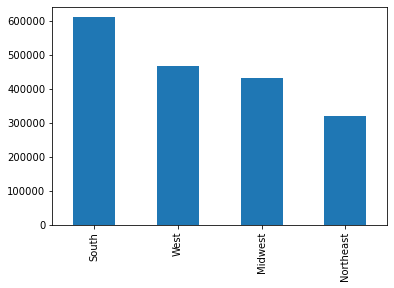

In [105]:
#Create a bar chart
bar = df_merged['region'].value_counts().plot.bar()

In [106]:
#Save bar chart
bar.figure.savefig(r'C:\Users\kelly\OneDrive\Desktop\Instacart Project Folder\Analysis\Visualizations/bar_regions.png')

04. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [107]:
df_merged.groupby('order_number')

In [108]:
df_merged.groupby('user_id')['order_number'].min

<bound method GroupBy.min of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002615A8092E0>>

In [109]:
df_merged.groupby('user_id').order_number.min()

user_id
2          3
3         16
4         36
5         42
6          4
          ..
206202    11
206204    32
206206    31
206207    15
206209     2
Name: order_number, Length: 181236, dtype: int64

In [110]:
df_merged['min_order'] = df_merged.groupby(['user_id'])['order_number'].transform(np.min)

In [111]:
df_merged.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,first_name,last_name,state,age,date_joined,no_of_dependents,marital_status,income,region,min_order
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19


In [112]:
df_merged.loc[df_merged['min_order'] < 5, 'exclusion_flag'] = 'low-activity customers'

In [113]:
df_merged['exclusion_flag'].value_counts(dropna = False)

NaN                       1474035
low-activity customers     353767
Name: exclusion_flag, dtype: int64

In [114]:
df_merged.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,last_name,state,age,date_joined,no_of_dependents,marital_status,income,region,min_order,exclusion_flag
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,NaN
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,NaN
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,NaN
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,NaN
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,NaN


In [115]:
df_merged.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest days', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spend_habits', 'spending_flag', 'ordering_behavior',
       'order_frequency_flag', 'first_name', 'last_name', 'state', 'age',
       'date_joined', 'no_of_dependents', 'marital_status', 'income', 'region',
       'min_order', 'exclusion_flag'],
      dtype='object')

In [116]:
df_merged.groupby(['region', 'spending_flag']).sum()

Unnamed: 0.1  Unnamed: 0_x     order_id      user_id  \
region    spending_flag                                                         
Midwest   High Spender    38696995601   38696995601   2282048605   2282048605   
          Low Spender    699802492306  699802492306  42068435190  42068435190   
Northeast High Spender    29357580492   29357580492   1761842195   1761842195   
          Low Spender    516998979768  516998979768  31333724923  31333724923   
South     High Spender    55474247802   55474247802   3306816195   3306816195   
          Low Spender    988475772907  988475772907  59712232869  59712232869   
West      High Spender    41546890596   41546890596   2522631739   2522631739   
          Low Spender    757584292702  757584292702  45500507241  45500507241   

                         order_number  orders_day_of_week  order_hour_of_day  \
region    spending_flag                                                        
Midwest   High Spender         407148               63767             306586   
          Low Spender         7512695             1117608            5479590   
Northeast High Spender         317659               47864             236343   
          Low Spender         5568515              819630            4055811   
South     High Spender         591043               89205             433152   
          Low Spender        10649091             1595100            7723759   
West      High Spender         437728               67331             324653   
          Low Spender         8052078             1208435            5931027   

                         days_since_prior_order   product_id  \
region    spending_flag                                        
Midwest   High Spender                 236328.0    575080903   
          Low Spender                 4537625.0  10451613536   
Northeast High Spender                 180047.0    443176429   
          Low Spender                 3385554.0   7764776123   
South     High Spender                 337206.0    820273223   
          Low Spender                 6398631.0  14795554527   
West      High Spender                 262502.0    613802594   
          Low Spender                 4919932.0  11313577133   

                         add_to_cart_order  ...  aisle_id  department_id  \
region    spending_flag                     ...                            
Midwest   High Spender              115845  ...   1603413         213277   
          Low Spender              3483370  ...  29080237        4065562   
Northeast High Spender               88999  ...   1239122         164068   
          Low Spender              2576530  ...  21579491        3017300   
South     High Spender              162419  ...   2294381         304204   
          Low Spender              4937358  ...  41111757        5758470   
West      High Spender              120889  ...   1718852         228266   
          Low Spender              3797533  ...  31454958        4387020   

                            prices  max_order  spend_habits  \
region    spending_flag                                       
Midwest   High Spender   2261342.1     407148     2261342.1   
          Low Spender    3120147.3    7512695     3120147.3   
Northeast High Spender   1493710.3     317659     1493710.3   
          Low Spender    2307276.1    5568515     2307276.1   
South     High Spender   3152864.0     591043     3152864.0   
          Low Spender    4403206.2   10649091     4403206.2   
West      High Spender   2208989.5     437728     2208989.5   
          Low Spender    3373228.4    8052078     3373228.4   

                         ordering_behavior       age  no_of_dependents  \
region    spending_flag                                                  
Midwest   High Spender            236328.0   1123575             33979   
          Low Spender            4537625.0  20236780            616563   
Northeast High Spender            180047.0    858322             25666   
          

In [117]:
regional_spending = df_merged.groupby(['region', 'spending_flag'])['spend_habits'].sum()

In [118]:
df_merged.groupby(['region', 'spending_flag'])['spend_habits'].sum()

region     spending_flag
Midwest    High Spender     2261342.1
           Low Spender      3120147.3
Northeast  High Spender     1493710.3
           Low Spender      2307276.1
South      High Spender     3152864.0
           Low Spender      4403206.2
West       High Spender     2208989.5
           Low Spender      3373228.4
Name: spend_habits, dtype: float64

In [ ]:
#Graph to show different spending habits between the US regions.
regional_spend = sns.catplot(data=df_merged, kind = 'bar', x='region', y='spend_habits', hue = 'spending_flag')

In [ ]:
#save graph
regional_spend.figure.savefig(r'C:\Users\kelly\OneDrive\Desktop\Instacart Project Folder\Analysis\Visualizations/regional_spend.png')

In [ ]:
#Export data set with exclusion_flag 
df_merged.to_pickle(r'C:\Users\kelly\OneDrive\Desktop\Prepared Data/exclusion_flag.pkl')

In [ ]:
#Create a new data set by dropping the exclusion_flag
df_merged_2 = df_merged.drop(columns = ['exclusion_flag'])

In [ ]:
df_merged_2.head()

In [ ]:
#Check new data set column names
df_merged_2.columns

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [ ]:
bar = df_merged_2['department_id'].value_counts().plot.bar().sort_index()


In [ ]:
group = df_merged_2.groupby('age')

In [ ]:
group.head()

In [ ]:
df_merged_2['age_flag'].value_counts

In [ ]:
df_merged_2.groupby('age')

In [ ]:
df_merged_2.groupby('age')['order_number'].sum

In [ ]:
df_merged_2.groupby('age').order_number.sum()

In [ ]:
#Create an age_flag using loc
df_merged_2['age_profile'] = df_merged_2.groupby(['age'])['order_number'].transform(np.sum)

In [ ]:
df_merged_2.head()

In [ ]:
df_merged_2.loc[df_merged_2['age'] < 30, 'age_flag'] = 'Young'

In [ ]:
df_merged_2.loc[(df_merged_2['age'] >=30) & (df_merged_2['age'] <=65), 'age_flag'] = 'Middle Aged'

In [ ]:
df_merged_2.loc[df_merged_2['age']>65, 'age_flag'] = 'Older Aged'

In [ ]:
df_merged_2.head()

In [ ]:
df_merged_2['age_flag'].value_counts

In [ ]:
#Create bar chart
bar_age = df_merged_2['age_flag'].value_counts().plot.bar()

In [ ]:
#Save bar_age figure
bar_age.figure.savefig(r'C:\Users\kelly\OneDrive\Desktop\Instacart Project Folder\Analysis\Visualizations/age_distribution.png')

In [ ]:
df_merged_2.groupby('income')

In [ ]:
df_merged_2.groupby('income')['user_id'].sum

In [ ]:
df_merged_2.groupby('income').user_id.sum()

In [ ]:
#Create an income_profile using loc
df_merged_2['income_profile'] = df_merged_2.groupby(['income'])['user_id'].transform(np.sum)

In [ ]:
df_merged_2.head()

In [ ]:
df_merged_2.loc[df_merged_2['income'] < 52520, 'income_profile'] = 'Low'

In [ ]:
df_merged_2.loc[(df_merged_2['income'] >=52520) & (df_merged_2['income'] <=156000), 'income_profile'] = 'Middle'

In [ ]:
df_merged_2.loc[df_merged_2['income']>156000, 'income_profile'] = 'High'

In [ ]:
df_merged_2.head()

In [ ]:
df_merged_2['income_profile'].value_counts#Create bar chart
bar_income = df_merged_2['income_profile'].value_counts().plot.bar()

In [ ]:
#Create bar chart
bar_income = df_merged_2['income_profile'].value_counts().plot.bar()

In [ ]:
#Save bar_age figure
bar_income.figure.savefig(r'C:\Users\kelly\OneDrive\Desktop\Instacart Project Folder\Analysis\Visualizations/income_distribution.png')

In [63]:
df_merged_2.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,first_name,last_name,state,age,date_joined,no_of_dependents,marital_status,income,region,min_order
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,Jacqueline,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19


In [69]:
df_merged_2.groupby('marital_status')

In [73]:
df_merged_2.groupby('marital_status')['no_of_dependents'].sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002612EB4FA60>>

In [74]:
df_merged_2.groupby('marital_status').no_of_dependents.sum()

marital_status
divorced/widowed                          0
living with parents and siblings     171967
married                             2569769
single                                    0
Name: no_of_dependents, dtype: int64

In [76]:
df_merged_2.groupby('marital_status').no_of_dependents.sum()

marital_status
divorced/widowed                          0
living with parents and siblings     171967
married                             2569769
single                                    0
Name: no_of_dependents, dtype: int64

In [77]:
#Create an _profile using loc
df_merged_2['dependants_profile'] = df_merged_2.groupby(['marital_status'])['no_of_dependents'].transform(np.sum)

In [78]:
df_merged_2.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,last_name,state,age,date_joined,no_of_dependents,marital_status,income,region,min_order,dependants_profile
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,Roach,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967


In [81]:
df_merged_2.loc[df_merged_2['no_of_dependents'] >=1, 'dependent_profile'] = 'Dependents'

In [83]:
df_merged_2.loc[df_merged_2['no_of_dependents'] <1, 'dependent_profile'] = 'No Dependents'

In [84]:
df_merged_2.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,state,age,date_joined,no_of_dependents,marital_status,income,region,min_order,dependants_profile,dependent_profile
0,769,769,180919,180919,prior,19,3,8,8.0,196,...,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967,Dependents
1,769,769,180919,180919,prior,19,3,8,8.0,41787,...,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967,Dependents
2,769,769,180919,180919,prior,19,3,8,8.0,46149,...,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967,Dependents
3,769,769,180919,180919,prior,19,3,8,8.0,38928,...,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967,Dependents
4,769,769,180919,180919,prior,19,3,8,8.0,10441,...,Nebraska,21,1/1/2017,3,living with parents and siblings,56831,Midwest,19,171967,Dependents


In [86]:
df_merged_2['dependent_profile'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Dependents
1             Dependents
2             Dependents
3             Dependents
4             Dependents
               ...      
1827797    No Dependents
1827798       Dependents
1827799       Dependents
1827800       Dependents
1827801       Dependents
Name: dependent_profile, Length: 1827802, dtype: object>

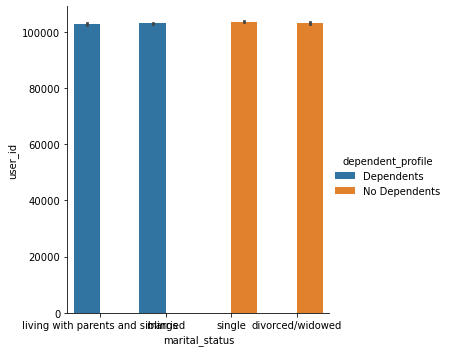

In [87]:
#Create bar chart
dependent_spend = sns.catplot(data=df_merged_2, kind = 'bar', x='marital_status', y='user_id', hue = 'dependent_profile')

In [89]:
#Save bar_dependents figure
dependent_spend.figure.savefig(r'C:\Users\kelly\OneDrive\Desktop\Instacart Project Folder\Analysis\Visualizations/dependent_distribution.png')

In [90]:
df_merged_2.groupby('department_id')

In [92]:
df_merged_2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest days', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spend_habits', 'spending_flag', 'ordering_behavior',
       'order_frequency_flag', 'first_name', 'last_name', 'state', 'age',
       'date_joined', 'no_of_dependents', 'marital_status', 'income', 'region',
       'min_order', 'dependants_profile', 'dependent_profile'],
      dtype='object')

In [124]:
df_merged_2.groupby('age')

In [125]:
df_merged_2.groupby('age')['order_number'].sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002615A809490>>

In [126]:
df_merged_2.groupby('age').order_number.sum()

age
18    546262
19    557574
20    520966
21    517403
22    503698
       ...  
77    554432
78    501489
79    531552
80    522512
81    526148
Name: order_number, Length: 64, dtype: int64

In [127]:
#Create an age_flag using loc
df_merged_2['age_profile'] = df_merged_2.groupby(['age'])['order_number'].transform(np.sum)

In [128]:
df_merged_2.loc[df_merged_2['age'] < 30, 'age_flag'] = 'Young'

In [129]:
df_merged_2.loc[(df_merged_2['age'] >=30) & (df_merged_2['age'] <=65), 'age_flag'] = 'Middle Aged'

In [130]:
df_merged_2.loc[df_merged_2['age']>65, 'age_flag'] = 'Older Aged'

In [131]:
df_merged_2['age_flag'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Young
1                Young
2                Young
3                Young
4                Young
              ...     
1827797     Older Aged
1827798    Middle Aged
1827799    Middle Aged
1827800    Middle Aged
1827801    Middle Aged
Name: age_flag, Length: 1827802, dtype: object>

In [132]:
df_merged_2.groupby('department_id')

In [ ]:
df_merged_2.to_pickle(r'C:\Users\kelly\OneDrive\Desktop\Prepared Data)